In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from utils.smo import SVM

data = pd.read_csv('health_data.csv')
data.head()

X = data.to_numpy()[:, :3]
Y = data.to_numpy()[:, 3]

/home/apps/anaconda3_2018/4.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/home/apps/anaconda3_2018/4.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()
/home/apps/anaconda3_2018/4.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

/home/apps/anaconda3_2018/4.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/home/apps/anaconda3_2018/4.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()
/home/apps/anaconda3_2018/4.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

Text(0.5, 1.0, 'Comparision between algorithms')

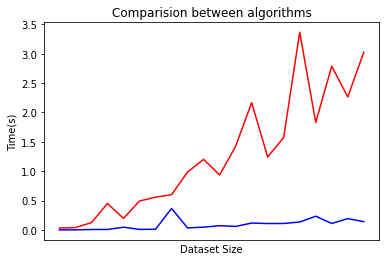

In [2]:
import time
from tqdm import tqdm
time_scikit = []
time_me = []
for split in (np.linspace(0.01, 0.99, 20)):
    #print(split)
    train_samples = np.random.choice(X.shape[0], int(split*X.shape[0]))
    test_samples = np.array([i for i in range(X.shape[0]) if i not in list(train_samples)])

    X_train = X[[train_samples]]
    Y_train = Y[[train_samples]]
    
    svc = SVC(kernel='linear')
    svm = SVM(kernel='linear')
    
    t1 = time.time()
    svc.fit(X_train, Y_train)
    
    t2 = time.time()
    svm.fit(X_train, Y_train)
    
    t3 = time.time()
    
    time_scikit.append(t2-t1)
    time_me.append(t3-t2)

plt.plot(time_scikit, 'b', label='scikit-learn')
plt.plot(time_me, 'r', label='our implementation')
plt.xticks(())
plt.xlabel('Dataset Size')
plt.ylabel("Time(s)")
plt.title('Comparision between algorithms')

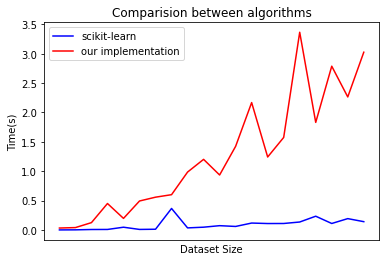

In [3]:
plt.plot(time_scikit, 'b', label='scikit-learn')
plt.plot(time_me, 'r', label='our implementation')
plt.xticks(())
plt.xlabel('Dataset Size')
plt.ylabel("Time(s)")
plt.title('Comparision between algorithms')
plt.legend()

In [4]:
svm = SVM(kernel='linear')
svm.fit(X, Y)

(array([576.,   1.,   1.,   0.,   0.,   2.,   1.,   0.,   1., 118.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

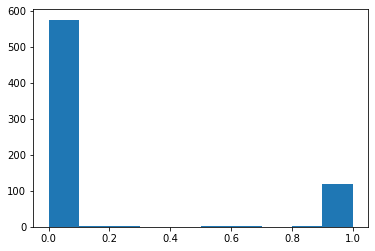

In [6]:
plt.hist(svm.alpha)